In [ ]:
import pandas as pd
import pickle

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph

import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
# 0.1 load data from file
from google.colab import files
import io

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving static_defenses.csv to static_defenses.csv
User uploaded file "static_defenses.csv" with length 5206629 bytes


In [ ]:
static_defenses = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')),index_col="id")
static_defenses.head()

,Unnamed: 0,defensivelinezonePlayers,deepzonePlayers,hookzonePlayers,curlzonePlayers,flatzonePlayers,defenseArea,defenseAreaCoverDefenders,width,height,numberQBs,numberWRs,numberTEs,numberRBs,numberFBs,numberOffensivePlayersAnotherPosition,numberSafeties,numberLBs,numberCBs,strongSide,numberPlayersDefenseStrongSide,numberPlayersDefenseWeakSide,numberPlayersOffenseStrongSide,numberPlayersOffenseWeakSide,differenceOffenseVsDefenseWidth,differenceOffenseVsDefenseStrongSide,differenceOffenseVsDefenseWeakSide,HeightByWeightDeep,HeightByWeightHook,HeightByWeightCurl,HeightByWeightFlat,WeightByArea,density,densityNoLine,densityInsidePoints,densityInsidePointsNoLine
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018090600:75:1,0,0,1,3,2,1,194.31095,194.31095,22.96,15.25,1,2,1,1,1,0,3,2,2,left,3,4,3,2,-0.63,0,-2,0.020227,0.018643,0.020066,0.021034,3.376032,0.036025,0.036025,6.974268,6.974268
2018090600:146:1,1,0,1,3,2,1,204.17725,204.17725,29.22,12.57,1,3,1,1,0,0,2,2,3,right,3,4,2,3,-1.15,-1,-1,0.020227,0.019228,0.020356,0.020455,3.178611,0.034284,0.034284,6.975511,6.975511
2018090600:168:1,2,0,1,2,2,2,277.65495,277.65495,33.67,15.21,1,2,1,2,0,0,2,2,3,left,5,2,4,1,0.71,-1,-1,0.020227,0.017683,0.020997,0.020745,2.337434,0.025211,0.025211,6.985594,6.985594
2018090600:190:1,3,1,0,2,3,1,189.16960,165.05520,26.42,12.91,1,3,1,1,0,0,3,1,3,right,2,5,2,3,-3.11,0,-2,0.000000,0.020120,0.021193,0.020455,3.192871,0.037004,0.036351,6.973569,6.969707
2018090600:320:1,5,1,0,3,3,1,187.12510,153.20020,27.80,13.29,1,3,1,1,0,0,2,3,3,left,3,5,3,2,-4.82,0,-3,0.000000,0.018995,0.019537,0.021279,4.281979,0.042752,0.045692,7.978624,7.980418


In [ ]:
static_defenses.drop(["Unnamed: 0"],axis=1,inplace=True)

In [ ]:
static_defenses.replace({"right":0,"left":1},inplace=True)

#Eliminar outliers

In [ ]:
#load dataset
pickle_file = open('outliers_minpts10_rs_3.pickle','rb')
outliers = pickle.load(pickle_file)
pickle_file.close()

In [ ]:
for play in list(outliers):
    static_defenses.drop(play,inplace=True)

#Normalización de los datos

In [ ]:
scaler = preprocessing.StandardScaler()
static_defenses1 = scaler.fit_transform(static_defenses)

In [ ]:
scaler = preprocessing.MinMaxScaler()
static_defenses2 = scaler.fit_transform(static_defenses)

In [ ]:
scaler = preprocessing.RobustScaler()
static_defenses3 = scaler.fit_transform(static_defenses)

In [ ]:
scaler = preprocessing.PowerTransformer()
static_defenses4 = scaler.fit_transform(static_defenses)

#PCA

In [ ]:
pca_ss = PCA ()
X_pca_ss = pca_ss.fit_transform(static_defenses1)
X_pca_ss.shape

(16415, 35)

In [ ]:
pca_mms = PCA ()
X_pca_mms = pca_mms.fit_transform(static_defenses2)
X_pca_mms.shape

(16415, 35)

In [ ]:
pca_rs = PCA ()
X_pca_rs = pca_rs.fit_transform(static_defenses3)
X_pca_rs.shape

(16415, 35)

In [ ]:
pca_pt = PCA ()
X_pca_pt = pca_pt.fit_transform(static_defenses4)
X_pca_pt.shape

(16415, 35)

In [ ]:
exp_var_cumul = np.cumsum(pca_ss.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

Para este 14 componentes

In [ ]:
exp_var_cumul = np.cumsum(pca_mms.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

Para este 8 componentes

In [ ]:
exp_var_cumul = np.cumsum(pca_rs.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "Número de componentes", "y": "Variabilidad"}
)

Para este 5 componentes

In [ ]:
exp_var_cumul = np.cumsum(pca_pt.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

Para este 13 componentes

De momento vamos a probar con el RobustScaler con 5 componentes

##Nuevos datasets

In [ ]:
X_pca_ss = PCA(n_components = 14).fit_transform(static_defenses1)
X_pca_ss.shape

(16415, 14)

In [ ]:
X_pca_mms = PCA(n_components = 8).fit_transform(static_defenses2)
X_pca_mms.shape

(16415, 8)

In [ ]:
X_pca_rs = PCA(n_components = 5).fit_transform(static_defenses3)
X_pca_rs.shape

(16415, 5)

In [ ]:
X_pca_pt = PCA(n_components = 13).fit_transform(static_defenses4)
X_pca_pt.shape

(16415, 13)

#KMEANS

In [ ]:
# parameters

# to run 10 times with different random centroids 
# to choose the final model as the one with the lowest SSE
iterations = 10

# maximum number of iterations for each single run
max_iter = 300 

# controls the tolerance with regard to the changes in the 
# within-cluster sum-squared-error to declare convergence

tol = 1e-04 

 # random seed
random_state = 0

##StandardScaler

In [ ]:
distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(i, init="k-means++", n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(X_pca_ss)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca_ss, labels))

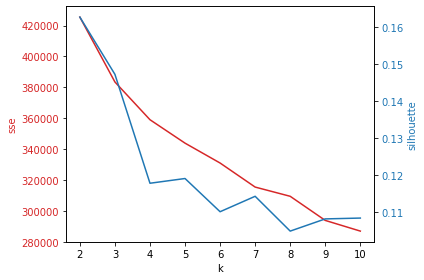

In [ ]:
x = [i for i in range(2,11)]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('k')
ax1.set_ylabel('sse', color=color)
ax1.plot(x, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(x, silhouettes, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
k = 3

In [ ]:
print ("Número de clusters", k)
km_ss = KMeans(k, init="k-means++", n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km_ss = km_ss.fit_predict(X_pca_ss)

Número de clusters 3


In [ ]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca_ss, y_km_ss))
      
print('Distortion: %.2f' % km_ss.inertia_)

Silhouette Coefficient: 0.147
Distortion: 383452.86


##MinMaxScaler

In [ ]:
distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(i, init="k-means++", n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(X_pca_mms)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca_mms, labels))

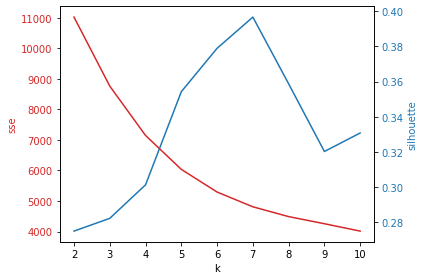

In [ ]:
x = [i for i in range(2,11)]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('k')
ax1.set_ylabel('sse', color=color)
ax1.plot(x, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(x, silhouettes, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
k = 7

In [ ]:
print ("Número de clusters", k)
km_mms = KMeans(k, init="k-means++", n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km_ss = km_mms.fit_predict(X_pca_mms)

Número de clusters 7


In [ ]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca_mms, y_km_ss))
      
print('Distortion: %.2f' % km_mms.inertia_)

Silhouette Coefficient: 0.397
Distortion: 4809.83


##RobustScaler

In [ ]:
distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(i, init="k-means++", n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(X_pca_rs)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca_rs, labels))

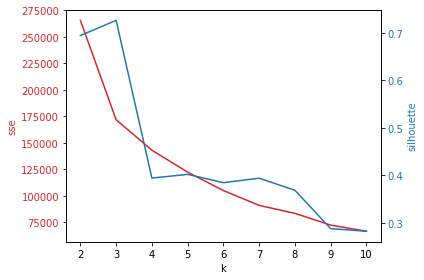

In [ ]:
x = [i for i in range(2,11)]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('k')
ax1.set_ylabel('sse', color=color)
ax1.plot(x, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(x, silhouettes, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
k = 3

In [ ]:
print ("Número de clusters", k)
km_rs = KMeans(k, init="k-means++", n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km_rs = km_rs.fit_predict(X_pca_rs)

Número de clusters 3


In [ ]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca_rs, y_km_rs))
      
print('Distortion: %.2f' % km_rs.inertia_)

Silhouette Coefficient: 0.726
Distortion: 171866.02


##PowerTransformer

In [ ]:
distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(i, init="k-means++", n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(X_pca_pt)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca_pt, labels))

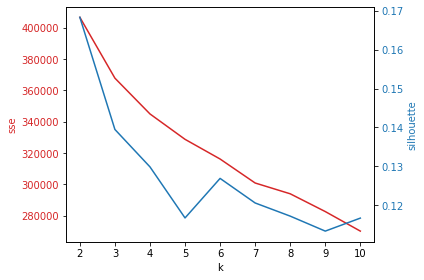

In [ ]:
x = [i for i in range(2,11)]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('k')
ax1.set_ylabel('sse', color=color)
ax1.plot(x, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(x, silhouettes, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [ ]:
k = 6

In [ ]:
print ("Número de clusters", k)
km_pt = KMeans(k, init="k-means++", n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km_pt = km_pt.fit_predict(X_pca_pt)

Número de clusters 6


In [ ]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca_pt, y_km_pt))
      
print('Distortion: %.2f' % km_pt.inertia_)

Silhouette Coefficient: 0.127
Distortion: 316230.78


##Resultados

In [ ]:
km_ss.labels_

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
km_mms.labels_

array([0, 2, 0, ..., 0, 1, 1], dtype=int32)

In [ ]:
km_rs.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
km_pt.labels_

array([1, 1, 4, ..., 4, 3, 3], dtype=int32)

In [ ]:
def replacePoint(number):
  return str(number).replace(".",",")

**StandardScaler**

In [ ]:
static_defenses_standardscaler = static_defenses.copy()

In [ ]:
static_defenses_standardscaler['cluster'] = km_ss.labels_

In [ ]:
static_defenses_standardscaler.to_csv("static_defenses_ss_kmeans_without_outliers.csv")

In [ ]:
static_defenses_standardscaler["defenseArea"] = static_defenses_standardscaler["defenseArea"].apply(replacePoint)
static_defenses_standardscaler["defenseAreaCoverDefenders"] = static_defenses_standardscaler["defenseAreaCoverDefenders"].apply(replacePoint)
static_defenses_standardscaler["width"] = static_defenses_standardscaler["width"].apply(replacePoint)
static_defenses_standardscaler["height"] = static_defenses_standardscaler["height"].apply(replacePoint)
static_defenses_standardscaler["differenceOffenseVsDefenseWidth"] = static_defenses_standardscaler["differenceOffenseVsDefenseWidth"].apply(replacePoint)
static_defenses_standardscaler["HeightByWeightDeep"] = static_defenses_standardscaler["HeightByWeightDeep"].apply(replacePoint)
static_defenses_standardscaler["HeightByWeightHook"] = static_defenses_standardscaler["HeightByWeightHook"].apply(replacePoint)
static_defenses_standardscaler["HeightByWeightCurl"] = static_defenses_standardscaler["HeightByWeightCurl"].apply(replacePoint)
static_defenses_standardscaler["HeightByWeightFlat"] = static_defenses_standardscaler["HeightByWeightFlat"].apply(replacePoint)
static_defenses_standardscaler["WeightByArea"] = static_defenses_standardscaler["WeightByArea"].apply(replacePoint)
static_defenses_standardscaler["density"] = static_defenses_standardscaler["density"].apply(replacePoint)
static_defenses_standardscaler["densityNoLine"] = static_defenses_standardscaler["densityNoLine"].apply(replacePoint)
static_defenses_standardscaler["densityNoLine"] = static_defenses_standardscaler["densityNoLine"].apply(replacePoint)
static_defenses_standardscaler["densityInsidePoints"] = static_defenses_standardscaler["densityInsidePoints"].apply(replacePoint)
static_defenses_standardscaler["densityInsidePointsNoLine"] = static_defenses_standardscaler["densityInsidePointsNoLine"].apply(replacePoint)

In [ ]:
static_defenses_standardscaler.to_csv("static_defenses_ss_kmeans_without_outliers_bigml.csv")

**MinMaxScaler**

In [ ]:
static_defenses_minmaxscaler = static_defenses.copy()

In [ ]:
static_defenses_minmaxscaler['cluster'] = km_mms.labels_

In [ ]:
static_defenses_minmaxscaler.to_csv("static_defenses_mms_kmeans_without_outliers.csv")

In [ ]:
static_defenses_minmaxscaler["defenseArea"] = static_defenses_minmaxscaler["defenseArea"].apply(replacePoint)
static_defenses_minmaxscaler["defenseAreaCoverDefenders"] = static_defenses_minmaxscaler["defenseAreaCoverDefenders"].apply(replacePoint)
static_defenses_minmaxscaler["width"] = static_defenses_minmaxscaler["width"].apply(replacePoint)
static_defenses_minmaxscaler["height"] = static_defenses_minmaxscaler["height"].apply(replacePoint)
static_defenses_minmaxscaler["differenceOffenseVsDefenseWidth"] = static_defenses_minmaxscaler["differenceOffenseVsDefenseWidth"].apply(replacePoint)
static_defenses_minmaxscaler["HeightByWeightDeep"] = static_defenses_minmaxscaler["HeightByWeightDeep"].apply(replacePoint)
static_defenses_minmaxscaler["HeightByWeightHook"] = static_defenses_minmaxscaler["HeightByWeightHook"].apply(replacePoint)
static_defenses_minmaxscaler["HeightByWeightCurl"] = static_defenses_minmaxscaler["HeightByWeightCurl"].apply(replacePoint)
static_defenses_minmaxscaler["HeightByWeightFlat"] = static_defenses_minmaxscaler["HeightByWeightFlat"].apply(replacePoint)
static_defenses_minmaxscaler["WeightByArea"] = static_defenses_minmaxscaler["WeightByArea"].apply(replacePoint)
static_defenses_minmaxscaler["density"] = static_defenses_minmaxscaler["density"].apply(replacePoint)
static_defenses_minmaxscaler["densityNoLine"] = static_defenses_minmaxscaler["densityNoLine"].apply(replacePoint)
static_defenses_minmaxscaler["densityNoLine"] = static_defenses_minmaxscaler["densityNoLine"].apply(replacePoint)
static_defenses_minmaxscaler["densityInsidePoints"] = static_defenses_minmaxscaler["densityInsidePoints"].apply(replacePoint)
static_defenses_minmaxscaler["densityInsidePointsNoLine"] = static_defenses_minmaxscaler["densityInsidePointsNoLine"].apply(replacePoint)

In [ ]:
static_defenses_minmaxscaler.to_csv("static_defenses_mms_kmeans_without_outliers_bigml.csv")

**RobustScaler**

In [ ]:
static_defenses_robustscaler = static_defenses.copy()

In [ ]:
static_defenses_robustscaler['cluster'] = km_rs.labels_

In [ ]:
static_defenses_robustscaler.to_csv("static_defenses_rs_kmeans_without_outliers.csv")

In [ ]:
static_defenses_robustscaler["defenseArea"] = static_defenses_robustscaler["defenseArea"].apply(replacePoint)
static_defenses_robustscaler["defenseAreaCoverDefenders"] = static_defenses_robustscaler["defenseAreaCoverDefenders"].apply(replacePoint)
static_defenses_robustscaler["width"] = static_defenses_robustscaler["width"].apply(replacePoint)
static_defenses_robustscaler["height"] = static_defenses_robustscaler["height"].apply(replacePoint)
static_defenses_robustscaler["differenceOffenseVsDefenseWidth"] = static_defenses_robustscaler["differenceOffenseVsDefenseWidth"].apply(replacePoint)
static_defenses_robustscaler["HeightByWeightDeep"] = static_defenses_robustscaler["HeightByWeightDeep"].apply(replacePoint)
static_defenses_robustscaler["HeightByWeightHook"] = static_defenses_robustscaler["HeightByWeightHook"].apply(replacePoint)
static_defenses_robustscaler["HeightByWeightCurl"] = static_defenses_robustscaler["HeightByWeightCurl"].apply(replacePoint)
static_defenses_robustscaler["HeightByWeightFlat"] = static_defenses_robustscaler["HeightByWeightFlat"].apply(replacePoint)
static_defenses_robustscaler["WeightByArea"] = static_defenses_robustscaler["WeightByArea"].apply(replacePoint)
static_defenses_robustscaler["density"] = static_defenses_robustscaler["density"].apply(replacePoint)
static_defenses_robustscaler["densityNoLine"] = static_defenses_robustscaler["densityNoLine"].apply(replacePoint)
static_defenses_robustscaler["densityNoLine"] = static_defenses_robustscaler["densityNoLine"].apply(replacePoint)
static_defenses_robustscaler["densityInsidePoints"] = static_defenses_robustscaler["densityInsidePoints"].apply(replacePoint)
static_defenses_robustscaler["densityInsidePointsNoLine"] = static_defenses_robustscaler["densityInsidePointsNoLine"].apply(replacePoint)

In [ ]:
static_defenses_robustscaler.to_csv("static_defenses_rs_kmeans_without_outliers_bigml.csv")

**PowerTransformer**

In [ ]:
static_defenses_powertransformer = static_defenses.copy()

In [ ]:
static_defenses_powertransformer['cluster'] = km_pt.labels_

In [ ]:
km_pt.labels_

array([1, 1, 4, ..., 4, 3, 3], dtype=int32)

In [ ]:
static_defenses_powertransformer.to_csv("static_defenses_pt_kmeans_without_outliers.csv")

In [ ]:
static_defenses_powertransformer["defenseArea"] = static_defenses_powertransformer["defenseArea"].apply(replacePoint)
static_defenses_powertransformer["defenseAreaCoverDefenders"] = static_defenses_powertransformer["defenseAreaCoverDefenders"].apply(replacePoint)
static_defenses_powertransformer["width"] = static_defenses_powertransformer["width"].apply(replacePoint)
static_defenses_powertransformer["height"] = static_defenses_powertransformer["height"].apply(replacePoint)
static_defenses_powertransformer["differenceOffenseVsDefenseWidth"] = static_defenses_powertransformer["differenceOffenseVsDefenseWidth"].apply(replacePoint)
static_defenses_powertransformer["HeightByWeightDeep"] = static_defenses_powertransformer["HeightByWeightDeep"].apply(replacePoint)
static_defenses_powertransformer["HeightByWeightHook"] = static_defenses_powertransformer["HeightByWeightHook"].apply(replacePoint)
static_defenses_powertransformer["HeightByWeightCurl"] = static_defenses_powertransformer["HeightByWeightCurl"].apply(replacePoint)
static_defenses_powertransformer["HeightByWeightFlat"] = static_defenses_powertransformer["HeightByWeightFlat"].apply(replacePoint)
static_defenses_powertransformer["WeightByArea"] = static_defenses_powertransformer["WeightByArea"].apply(replacePoint)
static_defenses_powertransformer["density"] = static_defenses_powertransformer["density"].apply(replacePoint)
static_defenses_powertransformer["densityNoLine"] = static_defenses_powertransformer["densityNoLine"].apply(replacePoint)
static_defenses_powertransformer["densityNoLine"] = static_defenses_powertransformer["densityNoLine"].apply(replacePoint)
static_defenses_powertransformer["densityInsidePoints"] = static_defenses_powertransformer["densityInsidePoints"].apply(replacePoint)
static_defenses_powertransformer["densityInsidePointsNoLine"] = static_defenses_powertransformer["densityInsidePointsNoLine"].apply(replacePoint)

In [ ]:
static_defenses_powertransformer.to_csv("static_defenses_pt_kmeans_without_outliers_bigml.csv")

**Resultados**

In [ ]:
res = static_defenses.groupby("kmeans_group_ss").describe()
res

defensivelinezonePlayers                                     \
                                   count      mean       std  min  25%  50%   
kmeans_group_ss                                                               
0                                 5079.0  0.675330  0.799224  0.0  0.0  0.0   
1                                 3555.0  2.331083  0.936852  0.0  2.0  2.0   
2                                 7781.0  0.552243  0.705106  0.0  0.0  0.0   

                          deepzonePlayers                                     \
                 75%  max           count      mean       std  min  25%  50%   
kmeans_group_ss                                                                
0                1.0  5.0          5079.0  0.204371  0.418615  0.0  0.0  0.0   
1                3.0  7.0          3555.0  0.513080  0.624068  0.0  0.0  0.0   
2                1.0  4.0          7781.0  0.692199  0.669172  0.0  0.0  1.0   

                          hookzonePlayers                                     \
                 75%  max           count      mean       std  min  25%  50%   
kmeans_group_ss                                                                
0                0.0  4.0          5079.0  2.647962  0.955958  0.0  2.0  3.0   
1                1.0  5.0          3555.0  1.796343  0.955768  0.0  1.0  2.0   
2                1.0  5.0          7781.0  1.718545  0.828293  0.0  1.0  2.0   

                          curlzonePlayers                                     \
                 75%  max           count      mean       std  min  25%  50%   
kmeans_group_ss                                                                
0                3.0  6.0          5079.0  3.383737  1.032277  0.0  3.0  3.0   
1                2.0  6.0          3555.0  3.063010  1.049410  0.0  2.0  3.0   
2                2.0  5.0          7781.0  2.713790  0.990807  0.0  2.0  3.0   

                          flatzonePlayers                                     \
                 75%  max           count      mean       std  min  25%  50%   
kmeans_group_ss                                                                
0                4.0  8.0          5079.0  0.467612  0.577309  0.0  0.0  0.0   
1                4.0  7.0          3555.0  1.333333  0.704116  0.0  1.0  1.0   
2                3.0  7.0          7781.0  1.630896  0.534171  0.0  1.0  2.0   

                          defenseArea                                    \
                 75%  max       count        mean        std        min   
kmeans_group_ss                                                           
0                1.0  2.0      5079.0  155.099473  37.008883   34.17885   
1                2.0  3.0      3555.0  257.177811  67.727676   53.86995   
2                2.0  4.0      7781.0  259.953025  64.384686  127.37790   

                                                               \
                        25%        50%         75%        max   
kmeans_group_ss                                                 
0                131.953225  157.35845  180.920125   281.2447   
1                212.922900  248.62755  293.163575   883.7742   
2                218.119600  250.22380  290.200200  1220.3103   

                defenseAreaCoverDefenders                                   \
                                    count        mean        std       min   
kmeans_group_ss                                                              
0                                  5079.0  141.619360  38.298281  20.24140   
1                                  3555.0  222.066021  64.484169  28.79195   
2                                  7781.0  248.103869  63.165088  98.32020   

                                                               width  \
                      25%        50%         75%         max   count   
kmeans_group_ss                                                        
0                116.7063  143.93440  169.152400   281.24470  5079.0   
1                1

In [ ]:
res = static_defenses.groupby("kmeans_group_mms").describe()
res

defensivelinezonePlayers                                     \
                                    count      mean       std  min  25%  50%   
kmeans_group_mms                                                               
0                                  2283.0  1.040736  1.070522  0.0  0.0  1.0   
1                                  4254.0  0.961683  1.077827  0.0  0.0  1.0   
2                                  3708.0  0.931769  1.010564  0.0  0.0  1.0   
3                                  1179.0  1.033927  1.096624  0.0  0.0  1.0   
4                                   859.0  0.949942  1.044939  0.0  0.0  1.0   
5                                  1514.0  0.964993  1.019682  0.0  0.0  1.0   
6                                  2618.0  0.991597  1.126981  0.0  0.0  1.0   

                           deepzonePlayers                                     \
                  75%  max           count      mean       std  min  25%  50%   
kmeans_group_mms                                                                
0                 2.0  6.0          2283.0  1.157249  0.457936  1.0  1.0  1.0   
1                 2.0  6.0          4254.0  0.000000  0.000000  0.0  0.0  0.0   
2                 2.0  7.0          3708.0  1.136731  0.406873  1.0  1.0  1.0   
3                 2.0  6.0          1179.0  0.398643  0.598979  0.0  0.0  0.0   
4                 2.0  6.0           859.0  1.072177  0.333668  1.0  1.0  1.0   
5                 2.0  6.0          1514.0  0.000000  0.000000  0.0  0.0  0.0   
6                 2.0  7.0          2618.0  0.000000  0.000000  0.0  0.0  0.0   

                           hookzonePlayers                                     \
                  75%  max           count      mean       std  min  25%  50%   
kmeans_group_mms                                                                
0                 1.0  5.0          2283.0  1.554095  0.765168  0.0  1.0  2.0   
1                 0.0  0.0          4254.0  2.197931  0.970932  0.0  2.0  2.0   
2                 1.0  5.0          3708.0  1.591154  0.774943  0.0  1.0  2.0   
3                 1.0  5.0          1179.0  2.493639  1.070797  0.0  2.0  2.0   
4                 1.0  5.0           859.0  1.982538  0.892038  0.0  1.0  2.0   
5                 0.0  0.0          1514.0  2.814399  1.024113  0.0  2.0  3.0   
6                 0.0  0.0          2618.0  2.102750  0.951511  0.0  1.0  2.0   

                           curlzonePlayers                                     \
                  75%  max           count      mean       std  min  25%  50%   
kmeans_group_mms                                                                
0                 2.0  4.0          2283.0  2.430136  0.868074  0.0  2.0  2.0   
1                 3.0  6.0          4254.0  3.048425  0.984482  0.0  2.0  3.0   
2                 2.0  5.0          3708.0  2.478964  0.860574  0.0  2.0  2.0   
3                 3.0  6.0          1179.0  3.769296  0.955392  1.0  3.0  4.0   
4                 3.0  4.0           859.0  3.570431  0.885317  1.0  3.0  4.0   
5                 3.0  6.0          1514.0  3.861295  0.999958  1.0  3.0  4.0   
6                 3.0  5.0          2618.0  3.103896  1.002050  0.0  2.0  3.0   

                           flatzonePlayers                                     \
                  75%  max           count      mean       std  min  25%  50%   
kmeans_group_mms                                                                
0                 3.0  5.0          2283.0  1.589137  0.508736  0.0  1.0  2.0   
1                 4.0  7.0          4254.0  1.500235  0.503339  1.0  1.0  1.0   
2                 3.0  5.0          3708.0  1.578749  0.505701  1.0  1.0  2.0   
3                 4.0  7.0          1179.0  0.000000  0.000000  0.0  0.0  0.0   
4                 4.0  6.0           859.0  0.000000  0.000000  0.0  0.0  0.0   
5                 4.0  8.0          1514.0  0.000000  0.000000  0.0  0.0  0.0   
6                 4.0  6.0          2618.0  1.505348  

In [ ]:
res = static_defenses.groupby("kmeans_group_rs").describe()
res

defensivelinezonePlayers                                     \
                                   count      mean       std  min  25%  50%   
kmeans_group_rs                                                               
0                                12336.0  0.918855  1.020653  0.0  0.0  1.0   
1                                 3460.0  0.943931  1.010085  0.0  0.0  1.0   
2                                  619.0  2.282714  1.355514  0.0  1.0  2.0   

                          deepzonePlayers                                     \
                 75%  max           count      mean       std  min  25%  50%   
kmeans_group_rs                                                                
0                2.0  7.0         12336.0  0.518239  0.621327  0.0  0.0  0.0   
1                2.0  6.0          3460.0  0.385260  0.572434  0.0  0.0  0.0   
2                3.0  7.0           619.0  0.843296  0.873745  0.0  0.0  1.0   

                          hookzonePlayers                                     \
                 75%  max           count      mean       std  min  25%  50%   
kmeans_group_rs                                                                
0                1.0  5.0         12336.0  1.969682  0.859042  0.0  1.0  2.0   
1                1.0  5.0          3460.0  2.574855  0.989627  0.0  2.0  3.0   
2                1.0  5.0           619.0  0.000000  0.000000  0.0  0.0  0.0   

                          curlzonePlayers                                     \
                 75%  max           count      mean       std  min  25%  50%   
kmeans_group_rs                                                                
0                3.0  6.0         12336.0  2.765888  0.971415  0.0  2.0  3.0   
1                3.0  6.0          3460.0  3.728613  0.945488  1.0  3.0  4.0   
2                0.0  0.0           619.0  3.505654  1.245529  1.0  3.0  3.0   

                          flatzonePlayers                                     \
                 75%  max           count      mean       std  min  25%  50%   
kmeans_group_rs                                                                
0                3.0  6.0         12336.0  1.536803  0.506407  1.0  1.0  2.0   
1                4.0  7.0          3460.0  0.000000  0.000000  0.0  0.0  0.0   
2                4.0  8.0           619.0  1.368336  0.746100  0.0  1.0  2.0   

                          defenseArea                                   \
                 75%  max       count        mean        std       min   
kmeans_group_rs                                                          
0                2.0  4.0     12336.0  242.161296  70.387175  37.76505   
1                0.0  0.0      3460.0  164.005262  49.931950  34.17885   
2                2.0  3.0       619.0  274.558749  96.460595  70.11910   

                                                                 \
                        25%         50%         75%         max   
kmeans_group_rs                                                   
0                197.453725  236.590500  280.814275  1164.97375   
1                132.061313  161.302375  191.028962   562.87990   
2                223.834725  267.286400  311.222000  1220.31030   

                defenseAreaCoverDefenders                                  \
                                    count        mean        std      min   
kmeans_group_rs                                                             
0                                 12336.0  224.477681  68.679769  26.1970   
1                                  3460.0  148.759397  48.332987  20.2414   
2                                   619.0  250.987803  98.249539  44.2679   

                                                                  width  \
                        25%        50%         75%         max    count   
kmeans_group_rs                                                           
0                180.159925  219.15245  264.176938  1164.97375  12336.0   
1     

In [ ]:
res = static_defenses.groupby("kmeans_group_pt").describe()
res

defensivelinezonePlayers                                     \
                                   count      mean       std  min  25%  50%   
kmeans_group_pt                                                               
0                                 2984.0  0.722855  0.833790  0.0  0.0  1.0   
1                                 2343.0  0.608621  0.747928  0.0  0.0  0.0   
2                                 3616.0  2.075774  1.002519  0.0  1.0  2.0   
3                                 3535.0  0.274399  0.584615  0.0  0.0  0.0   
4                                 3920.0  1.005612  0.978706  0.0  0.0  1.0   
5                                   17.0  0.764706  0.831370  0.0  0.0  1.0   

                          deepzonePlayers                                     \
                 75%  max           count      mean       std  min  25%  50%   
kmeans_group_pt                                                                
0                1.0  6.0          2984.0  0.028485  0.189020  0.0  0.0  0.0   
1                1.0  4.0          2343.0  1.014511  0.332875  0.0  1.0  1.0   
2                3.0  7.0          3616.0  0.222898  0.430621  0.0  0.0  0.0   
3                0.0  3.0          3535.0  0.097878  0.328832  0.0  0.0  0.0   
4                2.0  6.0          3920.0  1.180612  0.534143  0.0  1.0  1.0   
5                1.0  2.0            17.0  0.352941  0.492592  0.0  0.0  0.0   

                          hookzonePlayers                                     \
                 75%  max           count      mean       std  min  25%  50%   
kmeans_group_pt                                                                
0                0.0  4.0          2984.0  2.906501  0.942695  0.0  2.0  3.0   
1                1.0  5.0          2343.0  1.935553  0.813336  0.0  1.0  2.0   
2                0.0  3.0          3616.0  2.043695  0.944240  0.0  1.0  2.0   
3                0.0  4.0          3535.0  1.971711  0.880392  0.0  1.0  2.0   
4                1.0  5.0          3920.0  1.426531  0.744606  0.0  1.0  1.0   
5                1.0  1.0            17.0  2.764706  0.970143  1.0  2.0  3.0   

                          curlzonePlayers                                     \
                 75%  max           count      mean       std  min  25%  50%   
kmeans_group_pt                                                                
0                3.0  6.0          2984.0  3.398458  1.047519  0.0  3.0  3.0   
1                2.0  4.0          2343.0  3.166026  0.978945  0.0  3.0  3.0   
2                3.0  6.0          3616.0  3.188883  1.051902  0.0  2.0  3.0   
3                3.0  5.0          3535.0  3.064781  1.014073  0.0  2.0  3.0   
4                2.0  4.0          3920.0  2.351786  0.854851  0.0  2.0  2.0   
5                3.0  5.0            17.0  2.823529  1.014599  0.0  2.0  3.0   

                          flatzonePlayers                                     \
                 75%  max           count      mean       std  min  25%  50%   
kmeans_group_pt                                                                
0                4.0  8.0          2984.0  0.359584  0.520181  0.0  0.0  0.0   
1                4.0  7.0          2343.0  0.552283  0.527366  0.0  0.0  1.0   
2                4.0  7.0          3616.0  1.289823  0.676879  0.0  1.0  1.0   
3                4.0  6.0          3535.0  1.630552  0.494881  0.0  1.0  2.0   
4                3.0  6.0          3920.0  1.785714  0.449547  0.0  2.0  2.0   
5                3.0  4.0            17.0  0.588235  0.712287  0.0  0.0  0.0   

                          defenseArea                                    \
                 75%  max       count        mean        std        min   
kmeans_group_pt                                                           
0                1.0  2.0      2984.0  137.634106  33.184167   34.17885   
1                1.0  2.0      2343.0  208.487829  36.393935  105.81785   
2                2.0  3.0      3616.0  230.86

#JERARQUICO

Obtenemos primero los clusteres

In [ ]:
# parameters

# to run 10 times with different random centroids 
# to choose the final model as the one with the lowest SSE
iterations = 10

# maximum number of iterations for each single run
max_iter = 300 

# controls the tolerance with regard to the changes in the 
# within-cluster sum-squared-error to declare convergence

tol = 1e-04 

 # random seed
random_state = 0

In [ ]:
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')

##StandardScaler

In [ ]:
k = 130

### Single

In [ ]:
print ("Número de clusters", k)
km_ss = KMeans(k, init="k-means++", n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km_ss = km_ss.fit_predict(X_pca_ss)

Número de clusters 130


In [ ]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca_ss, y_km_ss))
      
print('Distortion: %.2f' % km_ss.inertia_)

Silhouette Coefficient: 0.131
Distortion: 124760.45


In [ ]:
km_ss.cluster_centers_

array([[-5.36685773e+00, -2.69103042e-03, -1.33705739e+00, ...,
        -1.94294555e-01,  7.50006589e-03,  1.95771936e-01],
       [ 2.10556263e-01,  6.12036847e-01,  6.48116778e-01, ...,
         1.28803432e-01,  8.14424592e-02,  6.87470723e-02],
       [ 6.88395325e-01, -1.55120476e+00,  2.42818939e+00, ...,
        -5.06233622e-01, -7.30149830e-02, -5.08107352e-01],
       ...,
       [-1.36529220e+00,  3.25356264e+00, -2.05407828e+00, ...,
        -1.55874809e-01,  2.91069929e-02, -1.71701666e-01],
       [ 2.92927219e+00, -1.75391688e+00, -7.30182928e-01, ...,
         1.15582956e+00,  3.27003825e+00,  1.88342693e+00],
       [-3.54305417e+00,  2.36107169e+00,  1.41834899e+00, ...,
        -2.36929797e-01,  2.20258443e-03, -2.20881482e-01]])

In [ ]:
cut = 20

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



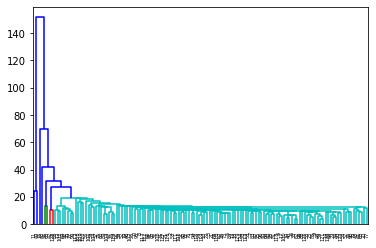

<Figure size 1440x1080 with 0 Axes>

In [ ]:
matsim = dist.pairwise(km_ss.cluster_centers_)
	
from scipy import cluster
clusters = cluster.hierarchy.linkage(matsim, method = 'single') #probar con single
cluster.hierarchy.dendrogram(clusters, color_threshold=cut)
plt.figure(figsize = (20,15))
plt.show()

In [ ]:
labels_ss = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
print ('Number of clusters %d' % (len(set(labels))))
labels_ss

Number of clusters 5


array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 6,
       5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5],
      dtype=int32)

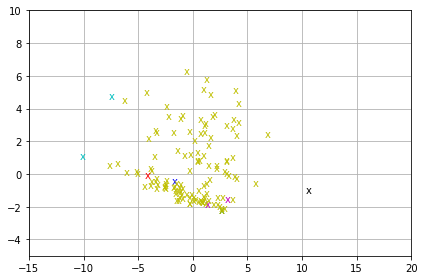

In [ ]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)


fig, ax = plt.subplots()
plt.xlim(-15, 20)
plt.ylim(-5, 10)

for i in range(len(km_ss.cluster_centers_)):
    plt.text(km_ss.cluster_centers_[i][0], km_ss.cluster_centers_[i][1], 'x', color=colors[labels_ss[i]])  
    
ax.grid(True)
fig.tight_layout()
plt.show()

###Complete

In [ ]:
print ("Número de clusters", k)
km_ss = KMeans(k, init="k-means++", n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km_ss = km_ss.fit_predict(X_pca_ss)

Número de clusters 130


In [ ]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca_ss, y_km_ss))
      
print('Distortion: %.2f' % km_ss.inertia_)

Silhouette Coefficient: 0.131
Distortion: 124760.45


In [ ]:
km_ss.cluster_centers_

array([[-5.36685773e+00, -2.69103102e-03, -1.33705739e+00, ...,
        -1.94294290e-01,  7.49990744e-03,  1.95772538e-01],
       [ 2.10556263e-01,  6.12036848e-01,  6.48116781e-01, ...,
         1.28803370e-01,  8.14426593e-02,  6.87462645e-02],
       [ 6.88395325e-01, -1.55120476e+00,  2.42818939e+00, ...,
        -5.06233688e-01, -7.30151108e-02, -5.08106465e-01],
       ...,
       [-1.36529220e+00,  3.25356263e+00, -2.05407828e+00, ...,
        -1.55874753e-01,  2.91072234e-02, -1.71702402e-01],
       [ 2.92927219e+00, -1.75391689e+00, -7.30182967e-01, ...,
         1.15583123e+00,  3.27003718e+00,  1.88343058e+00],
       [-3.54305417e+00,  2.36107168e+00,  1.41834898e+00, ...,
        -2.36929459e-01,  2.20248650e-03, -2.20882061e-01]])

In [ ]:
cut = 70

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



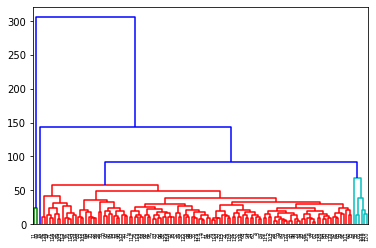

<Figure size 1440x1080 with 0 Axes>

In [ ]:
matsim = dist.pairwise(km_ss.cluster_centers_)
	
from scipy import cluster
clusters = cluster.hierarchy.linkage(matsim, method = 'complete') #probar con single
cluster.hierarchy.dendrogram(clusters, color_threshold=cut)
plt.figure(figsize = (20,15))
plt.show()

In [ ]:
labels_ss = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
print ('Number of clusters %d' % (len(set(labels_ss))))
labels_ss

Number of clusters 4


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2],
      dtype=int32)

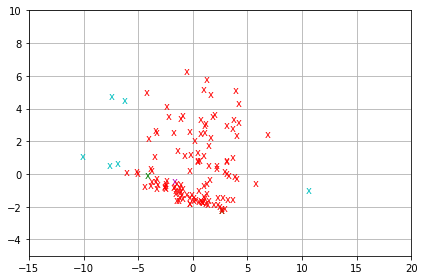

In [ ]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)


fig, ax = plt.subplots()
plt.xlim(-15, 20)
plt.ylim(-5, 10)

for i in range(len(km_ss.cluster_centers_)):
    plt.text(km_ss.cluster_centers_[i][0], km_ss.cluster_centers_[i][1], 'x', color=colors[labels_ss[i]])  
    
ax.grid(True)
fig.tight_layout()
plt.show()

##MinMaxScaler

In [ ]:
k = 130

###Single

In [ ]:
print ("Número de clusters", k)
km_mms = KMeans(k, init="k-means++", n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km_ss = km_mms.fit_predict(X_pca_mms)

Número de clusters 130


In [ ]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca_mms, y_km_ss))
      
print('Distortion: %.2f' % km_mms.inertia_)

Silhouette Coefficient: 0.206
Distortion: 1295.71


In [ ]:
km_mms.cluster_centers_

array([[-4.13758796e-01, -7.02596795e-02, -3.90082513e-01,
         4.52196433e-01, -2.80840835e-01,  1.58050288e-01,
        -1.12504500e-01, -4.98193833e-02],
       [ 8.05773129e-01,  1.31872580e-01,  1.72118176e-01,
        -2.60745301e-01, -3.09754630e-01,  3.73832778e-02,
        -5.24359666e-02, -7.81124004e-02],
       [-3.55209221e-01, -1.22839314e-01, -4.79662908e-01,
        -2.04951237e-01,  7.79108208e-02, -1.50641867e-01,
        -1.04418507e-01, -5.97125391e-03],
       [ 1.29253401e-01, -6.13986097e-01,  9.13279299e-02,
        -2.39088843e-01,  1.08916372e-01,  6.75860142e-02,
        -1.47021782e-01, -3.69542177e-02],
       [ 2.18419052e-01,  6.82640463e-01, -3.08895852e-01,
         1.46817576e-01,  1.67783350e-01,  1.03407062e-01,
        -2.16093623e-01,  1.55983332e-01],
       [-3.09305961e-01, -3.67121954e-01,  9.07897832e-01,
        -9.53609860e-02, -2.73594297e-01,  8.61169273e-02,
         8.59041490e-02, -6.71492929e-02],
       [-2.09346902e-01,  9.283174

In [ ]:
cut = 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



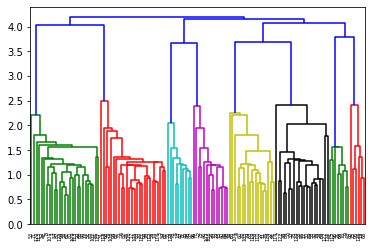

<Figure size 1440x1080 with 0 Axes>

In [ ]:
matsim = dist.pairwise(km_mms.cluster_centers_)
	
from scipy import cluster
clusters = cluster.hierarchy.linkage(matsim, method = 'single') #probar con single
cluster.hierarchy.dendrogram(clusters, color_threshold=cut)
plt.figure(figsize = (20,15))
plt.show()

In [ ]:
labels_mms = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
print ('Number of clusters %d' % (len(set(labels))))
labels_mms

Number of clusters 5


array([6, 1, 4, 2, 5, 3, 2, 6, 1, 7, 2, 5, 6, 1, 2, 4, 7, 2, 3, 8, 1, 7,
       5, 4, 1, 8, 2, 5, 6, 4, 6, 2, 6, 2, 5, 5, 6, 5, 6, 2, 4, 7, 1, 7,
       1, 2, 4, 3, 3, 3, 6, 1, 1, 1, 1, 3, 5, 1, 6, 2, 5, 1, 2, 5, 7, 5,
       2, 2, 8, 6, 4, 1, 3, 2, 6, 4, 3, 4, 6, 5, 1, 1, 2, 2, 6, 6, 4, 1,
       1, 6, 7, 5, 8, 2, 2, 8, 4, 3, 4, 1, 2, 1, 1, 5, 5, 2, 2, 4, 4, 1,
       5, 2, 2, 1, 6, 1, 2, 7, 2, 5, 1, 6, 6, 1, 5, 6, 8, 1, 3, 6],
      dtype=int32)

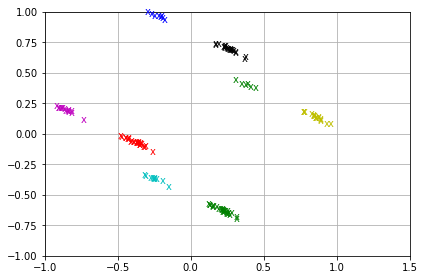

In [ ]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)


fig, ax = plt.subplots()
plt.xlim(-1, 1.5)
plt.ylim(-1,1)

for i in range(len(km_mms.cluster_centers_)):
    plt.text(km_mms.cluster_centers_[i][0], km_mms.cluster_centers_[i][1], 'x', color=colors[labels_mms[i]])  
    
ax.grid(True)
fig.tight_layout()
plt.show()

###Complete

In [ ]:
print ("Número de clusters", k)
km_mms = KMeans(k, init="k-means++", n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km_ss = km_mms.fit_predict(X_pca_mms)

Número de clusters 130


In [ ]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca_mms, y_km_ss))
      
print('Distortion: %.2f' % km_mms.inertia_)

Silhouette Coefficient: 0.207
Distortion: 1295.35


In [ ]:
km_mms.cluster_centers_

array([[ 0.28810168,  0.65095394, -0.36048391, ..., -0.0290743 ,
        -0.13340955, -0.05300874],
       [ 0.10011973, -0.59875672,  0.12089541, ...,  0.27045208,
         0.12078961,  0.01872799],
       [-0.83782044,  0.1632607 ,  0.39242985, ..., -0.08728693,
        -0.04501806, -0.04530464],
       ...,
       [ 0.1316017 , -0.61596223,  0.07818995, ...,  0.54518809,
         0.24175739,  0.17529171],
       [-0.21158294, -0.41127102,  0.84090302, ..., -0.19271437,
         0.04613926,  0.05107438],
       [ 0.24797234,  0.66288374, -0.32979596, ..., -0.01531609,
        -0.14276806,  0.17473993]])

In [ ]:
cut = 6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



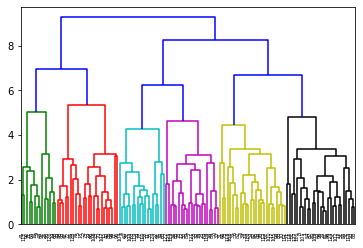

<Figure size 1440x1080 with 0 Axes>

In [ ]:
matsim = dist.pairwise(km_mms.cluster_centers_)
	
from scipy import cluster
clusters = cluster.hierarchy.linkage(matsim, method = 'complete') #probar con single
cluster.hierarchy.dendrogram(clusters, color_threshold=cut)
plt.figure(figsize = (20,15))
plt.show()

In [ ]:
labels_mms = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
print ('Number of clusters %d' % (len(set(labels_mms))))
labels_mms

Number of clusters 6


array([4, 6, 2, 5, 3, 2, 5, 4, 6, 1, 5, 3, 4, 6, 5, 2, 1, 5, 2, 1, 6, 1,
       3, 2, 6, 1, 5, 3, 4, 2, 4, 5, 4, 5, 3, 3, 4, 3, 4, 5, 2, 1, 6, 1,
       6, 5, 2, 2, 2, 2, 4, 6, 6, 6, 6, 2, 3, 6, 4, 5, 3, 6, 5, 3, 1, 3,
       5, 5, 1, 4, 2, 6, 2, 5, 4, 2, 2, 2, 4, 3, 6, 6, 5, 5, 4, 4, 2, 6,
       6, 4, 1, 3, 1, 5, 5, 1, 2, 2, 2, 6, 5, 6, 6, 3, 3, 5, 5, 2, 2, 6,
       3, 5, 5, 6, 4, 6, 5, 1, 5, 3, 6, 4, 4, 6, 3, 4, 1, 6, 2, 4],
      dtype=int32)

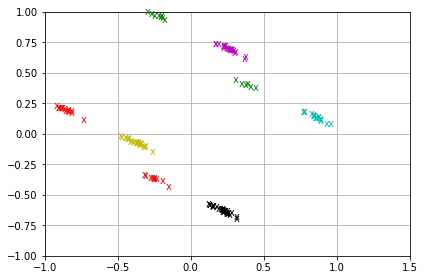

In [ ]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)


fig, ax = plt.subplots()
plt.xlim(-1, 1.5)
plt.ylim(-1,1)

for i in range(len(km_mms.cluster_centers_)):
    plt.text(km_mms.cluster_centers_[i][0], km_mms.cluster_centers_[i][1], 'x', color=colors[labels_mms[i]])  
    
ax.grid(True)
fig.tight_layout()
plt.show()

##RobustScaler

In [ ]:
k = 130

###Single

In [ ]:
print ("Número de clusters", k)
km_rs = KMeans(k, init="k-means++", n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km_rs = km_rs.fit_predict(X_pca_rs)

Número de clusters 130


In [ ]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca_rs, y_km_rs))
      
print('Distortion: %.2f' % km_rs.inertia_)

Silhouette Coefficient: 0.176
Distortion: 15453.77


In [ ]:
km_rs.cluster_centers_

array([[-2.89145588e+00, -7.48854658e-01,  4.90220165e-02,
        -1.26051793e+00,  1.76247391e+00],
       [ 1.05964241e+01, -9.58602091e-02,  2.78236823e-01,
        -1.15354556e+00,  4.23342298e-01],
       [-3.64375624e+00,  1.23993233e+01,  2.75649139e+00,
        -1.86049202e+00, -1.53974241e-01],
       [-3.08631366e+00, -8.05596796e-01, -1.00182960e+00,
         3.73010069e-01,  8.41101181e-01],
       [-3.09118107e+00, -9.30854301e-01,  5.43272395e-01,
        -1.07298465e+00, -1.00433822e+00],
       [-2.38232450e+00, -8.34598317e-01,  1.62656619e+00,
         2.82836373e+00,  4.26355724e-01],
       [-3.72299624e+00, -9.25818490e-01, -2.26729086e+00,
        -1.71357311e+00,  1.91557370e+01],
       [-9.54442821e-01, -2.93898201e+00,  8.35493548e+00,
         2.56366057e-01, -1.12224754e-01],
       [ 9.37662985e+00,  1.35250808e+01,  8.01319853e-01,
        -1.86468020e+00, -1.22983676e-01],
       [ 1.00946078e+01, -1.03478193e-01, -2.60110013e+00,
         1.37881745e-01

In [ ]:
cut = 35

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



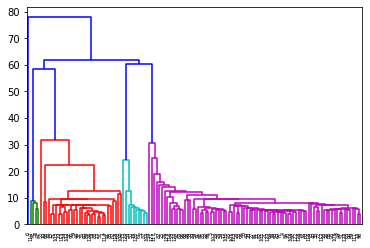

<Figure size 1440x1080 with 0 Axes>

In [ ]:
matsim = dist.pairwise(km_rs.cluster_centers_)
	
from scipy import cluster
clusters = cluster.hierarchy.linkage(matsim, method = 'single') #probar con single
cluster.hierarchy.dendrogram(clusters, color_threshold=cut)
plt.figure(figsize = (20,15))
plt.show()

In [ ]:
labels_rs = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
print ('Number of clusters %d' % (len(set(labels_rs))))
labels_rs

Number of clusters 5


array([4, 2, 3, 4, 4, 4, 5, 4, 1, 2, 2, 4, 4, 4, 2, 2, 4, 2, 3, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4,
       4, 4, 2, 1, 4, 4, 3, 4, 4, 2, 4, 4, 3, 2, 4, 4, 2, 3, 2, 4, 4, 4,
       4, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 3,
       2, 2, 2, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 3, 4, 4, 4, 4, 2,
       1, 4, 4, 2, 2, 4, 4, 4, 2, 4, 3, 4, 4, 4, 4, 4, 2, 4, 4, 3],
      dtype=int32)

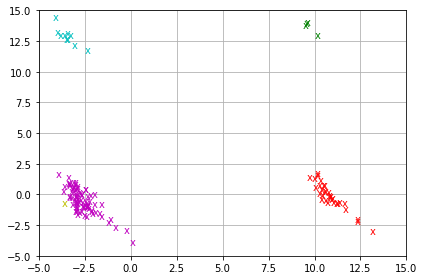

In [ ]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)


fig, ax = plt.subplots()
plt.xlim(-5, 15)
plt.ylim(-5, 15)

for i in range(len(km_rs.cluster_centers_)):
    plt.text(km_rs.cluster_centers_[i][0], km_rs.cluster_centers_[i][1], 'x', color=colors[labels_rs[i]])  
    
ax.grid(True)
fig.tight_layout()
plt.show()

###Complete

In [ ]:
print ("Número de clusters", k)
km_rs = KMeans(k, init="k-means++", n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km_rs = km_rs.fit_predict(X_pca_rs)

Número de clusters 130


In [ ]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca_rs, y_km_rs))
      
print('Distortion: %.2f' % km_rs.inertia_)

Silhouette Coefficient: 0.176
Distortion: 15452.66


In [ ]:
km_rs.cluster_centers_

array([[-2.88949461e+00, -7.63655395e-01,  6.14243195e-02,
        -1.25851488e+00,  1.76039554e+00],
       [ 1.05960567e+01, -1.05105129e-01,  2.71774967e-01,
        -1.15028854e+00,  4.38727131e-01],
       [-3.64375624e+00,  1.23993233e+01,  2.75649102e+00,
        -1.86048832e+00, -1.53978783e-01],
       [-3.08228491e+00, -8.08414314e-01, -1.00342324e+00,
         3.81290657e-01,  8.44500818e-01],
       [-3.09476894e+00, -9.28011883e-01,  5.43604345e-01,
        -1.07317217e+00, -1.00806853e+00],
       [-2.38197009e+00, -8.19238971e-01,  1.61677433e+00,
         2.82759368e+00,  4.10576698e-01],
       [-3.72299624e+00, -9.25818811e-01, -2.26729374e+00,
        -1.71355689e+00,  1.91557080e+01],
       [-9.54442820e-01, -2.93898163e+00,  8.35493037e+00,
         2.56344432e-01, -1.12253536e-01],
       [ 9.37662985e+00,  1.35250807e+01,  8.01319759e-01,
        -1.86467520e+00, -1.22987909e-01],
       [ 1.00996876e+01, -1.49390247e-01, -2.59170918e+00,
         1.37024456e-01

In [ ]:
cut = 80

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



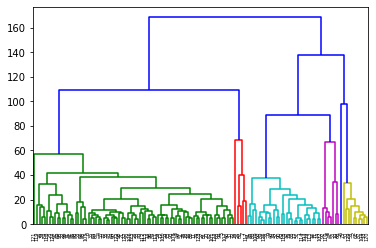

<Figure size 1440x1080 with 0 Axes>

In [ ]:
matsim = dist.pairwise(km_rs.cluster_centers_)
	
from scipy import cluster
clusters = cluster.hierarchy.linkage(matsim, method = 'complete') #probar con single
cluster.hierarchy.dendrogram(clusters, color_threshold=cut)
plt.figure(figsize = (20,15))
plt.show()

In [ ]:
labels_rs = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
print ('Number of clusters %d' % (len(set(labels_rs))))
labels_rs

Number of clusters 6


array([1, 3, 5, 1, 1, 1, 6, 2, 4, 3, 4, 1, 1, 1, 3, 3, 1, 3, 5, 3, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 1, 1, 1, 3, 1, 1,
       1, 1, 3, 4, 1, 1, 5, 1, 1, 4, 1, 1, 5, 3, 1, 1, 3, 5, 3, 1, 1, 1,
       1, 1, 4, 1, 1, 3, 1, 1, 1, 5, 1, 1, 1, 3, 3, 1, 2, 3, 1, 1, 1, 5,
       3, 3, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 5, 1, 1, 1, 1, 3,
       4, 1, 1, 3, 3, 1, 1, 2, 3, 1, 5, 1, 1, 1, 1, 1, 3, 1, 1, 5],
      dtype=int32)

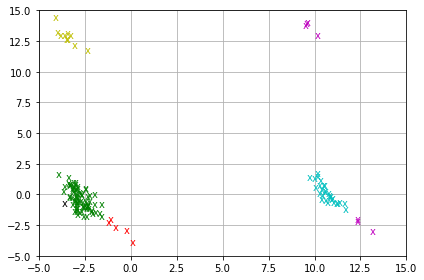

In [ ]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)


fig, ax = plt.subplots()
plt.xlim(-5, 15)
plt.ylim(-5, 15)

for i in range(len(km_rs.cluster_centers_)):
    plt.text(km_rs.cluster_centers_[i][0], km_rs.cluster_centers_[i][1], 'x', color=colors[labels_rs[i]])  
    
ax.grid(True)
fig.tight_layout()
plt.show()

##PowerTransformer

In [ ]:
k = 130

###Single

In [ ]:
print ("Número de clusters", k)
km_pt = KMeans(k, init="k-means++", n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km_pt = km_pt.fit_predict(X_pca_pt)

Número de clusters 130


In [ ]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca_pt, y_km_pt))
      
print('Distortion: %.2f' % km_pt.inertia_)

Silhouette Coefficient: 0.116
Distortion: 127105.11


In [ ]:
km_pt.cluster_centers_

array([[ 0.63765012, -2.24680203, -1.69974399, ..., -0.06531909,
        -0.35464249,  0.18808325],
       [ 0.32852469,  1.31374622,  1.25856818, ..., -0.0634621 ,
        -0.38072028,  0.33370831],
       [-3.71809081,  1.37560982,  2.17165223, ...,  0.0592126 ,
         1.51918267, -0.98515664],
       ...,
       [-1.13437327,  1.39430576,  0.31503159, ..., -0.04677101,
         0.07541566, -0.11479387],
       [-3.44791721,  1.63440762,  2.05582956, ..., -0.15361603,
         0.22940266,  0.05935191],
       [-0.70321179,  2.14071712,  1.31424879, ..., -0.27095053,
        -1.76199636,  0.22956024]])

In [ ]:
cut = 20

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



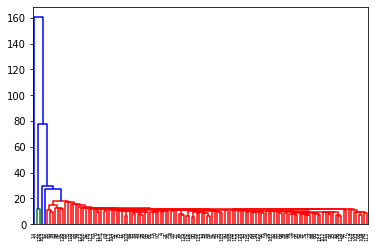

<Figure size 1440x1080 with 0 Axes>

In [ ]:
matsim = dist.pairwise(km_pt.cluster_centers_)
	
from scipy import cluster
clusters = cluster.hierarchy.linkage(matsim, method = 'single') #probar con single
cluster.hierarchy.dendrogram(clusters, color_threshold=cut)
plt.figure(figsize = (20,15))
plt.show()

In [ ]:
labels_pt = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
print ('Number of clusters %d' % (len(set(labels_pt))))
labels_pt

Number of clusters 5


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2],
      dtype=int32)

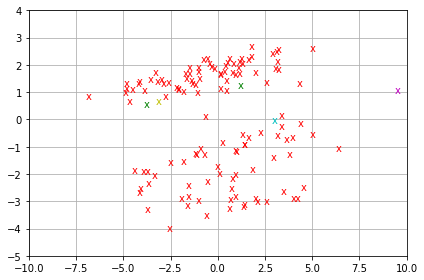

In [ ]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)


fig, ax = plt.subplots()
plt.xlim(-10, 10)
plt.ylim(-5, 4)

for i in range(len(km_pt.cluster_centers_)):
    plt.text(km_pt.cluster_centers_[i][0], km_pt.cluster_centers_[i][1], 'x', color=colors[labels_pt[i]])  
    
ax.grid(True)
fig.tight_layout()
plt.show()

###Complete

In [ ]:
print ("Número de clusters", k)
km_pt = KMeans(k, init="k-means++", n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km_pt = km_pt.fit_predict(X_pca_pt)

Número de clusters 130


In [ ]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca_pt, y_km_pt))
      
print('Distortion: %.2f' % km_pt.inertia_)

Silhouette Coefficient: 0.116
Distortion: 127105.10


In [ ]:
km_pt.cluster_centers_

array([[ 0.63765012, -2.24680203, -1.699744  , ..., -0.06531844,
        -0.35464033,  0.18808286],
       [ 0.32852469,  1.31374622,  1.25856819, ..., -0.06346226,
        -0.38072083,  0.33370805],
       [-3.71809081,  1.37560982,  2.1716522 , ...,  0.05921396,
         1.51918914, -0.98515402],
       ...,
       [-1.13437327,  1.39430576,  0.31503157, ..., -0.04677041,
         0.0754181 , -0.11479277],
       [-3.44791721,  1.63440762,  2.05582956, ..., -0.15361633,
         0.22940255,  0.05935507],
       [-0.70321178,  2.14071712,  1.31424875, ..., -0.27094872,
        -1.76198927,  0.22956333]])

In [ ]:
cut = 50

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



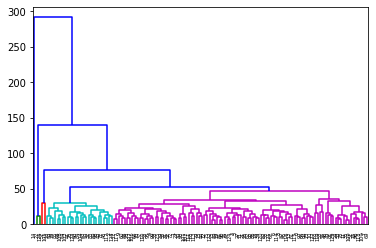

<Figure size 1440x1080 with 0 Axes>

In [ ]:
matsim = dist.pairwise(km_pt.cluster_centers_)
	
from scipy import cluster
clusters = cluster.hierarchy.linkage(matsim, method = 'complete') #probar con single
cluster.hierarchy.dendrogram(clusters, color_threshold=cut)
plt.figure(figsize = (20,15))
plt.show()

In [ ]:
labels_pt = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
print ('Number of clusters %d' % (len(set(labels_pt))))
labels_pt

Number of clusters 5


array([4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 3, 4, 4, 4, 3, 4,
       1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3,
       4, 4, 4, 4, 3, 4, 3, 4, 4, 4, 3, 4, 4, 2, 4, 3, 4, 4, 4, 4, 4, 4,
       4, 4, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3, 3, 3, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 3, 2, 4, 4, 3, 4,
       4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 1, 4, 3, 4],
      dtype=int32)

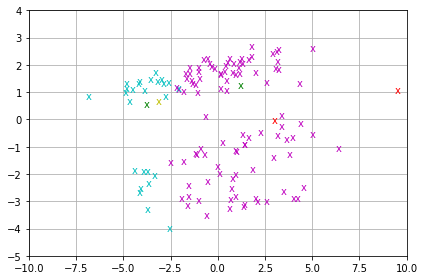

In [ ]:
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 20)


fig, ax = plt.subplots()
plt.xlim(-10, 10)
plt.ylim(-5, 4)

for i in range(len(km_pt.cluster_centers_)):
    plt.text(km_pt.cluster_centers_[i][0], km_pt.cluster_centers_[i][1], 'x', color=colors[labels_pt[i]])  
    
ax.grid(True)
fig.tight_layout()
plt.show()

##Resultados

In [ ]:
labels_ss

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 7, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 6,
       5, 5, 5, 5, 5, 2, 5, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5],
      dtype=int32)

In [ ]:
labels_mms

array([6, 1, 4, 2, 5, 3, 2, 6, 1, 7, 2, 5, 6, 1, 2, 4, 7, 2, 3, 8, 1, 7,
       5, 4, 1, 8, 2, 5, 6, 4, 6, 2, 6, 2, 5, 5, 6, 5, 6, 2, 4, 7, 1, 7,
       1, 2, 4, 3, 3, 3, 6, 1, 1, 1, 1, 3, 5, 1, 6, 2, 5, 1, 2, 5, 7, 5,
       2, 2, 8, 6, 4, 1, 3, 2, 6, 4, 3, 4, 6, 5, 1, 1, 2, 2, 6, 6, 4, 1,
       1, 6, 7, 5, 8, 2, 2, 8, 4, 3, 4, 1, 2, 1, 1, 5, 5, 2, 2, 4, 4, 1,
       5, 2, 2, 1, 6, 1, 2, 7, 2, 5, 1, 6, 6, 1, 5, 6, 8, 1, 3, 6],
      dtype=int32)

In [ ]:
labels_rs

array([4, 2, 3, 4, 4, 4, 5, 4, 1, 2, 2, 4, 4, 4, 2, 2, 4, 2, 3, 2, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 2, 4, 4, 4, 2, 4, 4,
       4, 4, 2, 1, 4, 4, 3, 4, 4, 2, 4, 4, 3, 2, 4, 4, 2, 3, 2, 4, 4, 4,
       4, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 3,
       2, 2, 2, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 3, 4, 4, 4, 4, 2,
       1, 4, 4, 2, 2, 4, 4, 4, 2, 4, 3, 4, 4, 4, 4, 4, 2, 4, 4, 3],
      dtype=int32)

In [ ]:
labels_pt

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2],
      dtype=int32)

In [ ]:
len(km_ss.labels_)

16415

In [ ]:
def replacePoint(number):
  return str(number).replace(".",",")

**StandardScaler**

In [ ]:
static_defenses_standardscaler = static_defenses.copy()

In [ ]:
static_defenses_standardscaler['cluster_center'] = km_ss.labels_

In [ ]:
static_defenses_standardscaler["cluster"] = labels_ss[static_defenses_standardscaler["cluster_center"].values]

In [ ]:
static_defenses_standardscaler.drop(["cluster_center"],axis=1,inplace=True)

In [ ]:
static_defenses_standardscaler.to_csv("static_defenses_ss_hierarchical_without_outliers.csv")

In [ ]:
static_defenses_standardscaler["defenseArea"] = static_defenses_standardscaler["defenseArea"].apply(replacePoint)
static_defenses_standardscaler["defenseAreaCoverDefenders"] = static_defenses_standardscaler["defenseAreaCoverDefenders"].apply(replacePoint)
static_defenses_standardscaler["width"] = static_defenses_standardscaler["width"].apply(replacePoint)
static_defenses_standardscaler["height"] = static_defenses_standardscaler["height"].apply(replacePoint)
static_defenses_standardscaler["differenceOffenseVsDefenseWidth"] = static_defenses_standardscaler["differenceOffenseVsDefenseWidth"].apply(replacePoint)
static_defenses_standardscaler["HeightByWeightDeep"] = static_defenses_standardscaler["HeightByWeightDeep"].apply(replacePoint)
static_defenses_standardscaler["HeightByWeightHook"] = static_defenses_standardscaler["HeightByWeightHook"].apply(replacePoint)
static_defenses_standardscaler["HeightByWeightCurl"] = static_defenses_standardscaler["HeightByWeightCurl"].apply(replacePoint)
static_defenses_standardscaler["HeightByWeightFlat"] = static_defenses_standardscaler["HeightByWeightFlat"].apply(replacePoint)
static_defenses_standardscaler["WeightByArea"] = static_defenses_standardscaler["WeightByArea"].apply(replacePoint)
static_defenses_standardscaler["density"] = static_defenses_standardscaler["density"].apply(replacePoint)
static_defenses_standardscaler["densityNoLine"] = static_defenses_standardscaler["densityNoLine"].apply(replacePoint)
static_defenses_standardscaler["densityNoLine"] = static_defenses_standardscaler["densityNoLine"].apply(replacePoint)
static_defenses_standardscaler["densityInsidePoints"] = static_defenses_standardscaler["densityInsidePoints"].apply(replacePoint)
static_defenses_standardscaler["densityInsidePointsNoLine"] = static_defenses_standardscaler["densityInsidePointsNoLine"].apply(replacePoint)

In [ ]:
static_defenses_standardscaler.to_csv("static_defenses_ss_hierarchical_without_outliers_bigml.csv")

**MinMaxScaler**

In [ ]:
static_defenses_minmaxscaler = static_defenses.copy()

In [ ]:
static_defenses_minmaxscaler['cluster_center'] = km_mms.labels_

In [ ]:
static_defenses_minmaxscaler["cluster"] = labels_mms[static_defenses_minmaxscaler["cluster_center"].values]

In [ ]:
static_defenses_minmaxscaler.drop(["cluster_center"],axis=1,inplace=True)

In [ ]:
static_defenses_minmaxscaler.to_csv("static_defenses_mms_hierarchical_without_outliers.csv")

In [ ]:
static_defenses_minmaxscaler["defenseArea"] = static_defenses_minmaxscaler["defenseArea"].apply(replacePoint)
static_defenses_minmaxscaler["defenseAreaCoverDefenders"] = static_defenses_minmaxscaler["defenseAreaCoverDefenders"].apply(replacePoint)
static_defenses_minmaxscaler["width"] = static_defenses_minmaxscaler["width"].apply(replacePoint)
static_defenses_minmaxscaler["height"] = static_defenses_minmaxscaler["height"].apply(replacePoint)
static_defenses_minmaxscaler["differenceOffenseVsDefenseWidth"] = static_defenses_minmaxscaler["differenceOffenseVsDefenseWidth"].apply(replacePoint)
static_defenses_minmaxscaler["HeightByWeightDeep"] = static_defenses_minmaxscaler["HeightByWeightDeep"].apply(replacePoint)
static_defenses_minmaxscaler["HeightByWeightHook"] = static_defenses_minmaxscaler["HeightByWeightHook"].apply(replacePoint)
static_defenses_minmaxscaler["HeightByWeightCurl"] = static_defenses_minmaxscaler["HeightByWeightCurl"].apply(replacePoint)
static_defenses_minmaxscaler["HeightByWeightFlat"] = static_defenses_minmaxscaler["HeightByWeightFlat"].apply(replacePoint)
static_defenses_minmaxscaler["WeightByArea"] = static_defenses_minmaxscaler["WeightByArea"].apply(replacePoint)
static_defenses_minmaxscaler["density"] = static_defenses_minmaxscaler["density"].apply(replacePoint)
static_defenses_minmaxscaler["densityNoLine"] = static_defenses_minmaxscaler["densityNoLine"].apply(replacePoint)
static_defenses_minmaxscaler["densityNoLine"] = static_defenses_minmaxscaler["densityNoLine"].apply(replacePoint)
static_defenses_minmaxscaler["densityInsidePoints"] = static_defenses_minmaxscaler["densityInsidePoints"].apply(replacePoint)
static_defenses_minmaxscaler["densityInsidePointsNoLine"] = static_defenses_minmaxscaler["densityInsidePointsNoLine"].apply(replacePoint)

In [ ]:
static_defenses_minmaxscaler.to_csv("static_defenses_mms_hierarchical_without_outliers_bigml.csv")

**RobustScaler**

In [ ]:
static_defenses_robustscaler = static_defenses.copy()

In [ ]:
static_defenses_robustscaler['cluster_center'] = km_rs.labels_

In [ ]:
static_defenses_robustscaler["cluster"] = labels_rs[static_defenses_robustscaler["cluster_center"].values]

In [ ]:
static_defenses_robustscaler.drop(["cluster_center"],axis=1,inplace=True)

In [ ]:
static_defenses_robustscaler.to_csv("static_defenses_rs_hierarchical_without_outliers.csv")

In [ ]:
static_defenses_robustscaler["defenseArea"] = static_defenses_robustscaler["defenseArea"].apply(replacePoint)
static_defenses_robustscaler["defenseAreaCoverDefenders"] = static_defenses_robustscaler["defenseAreaCoverDefenders"].apply(replacePoint)
static_defenses_robustscaler["width"] = static_defenses_robustscaler["width"].apply(replacePoint)
static_defenses_robustscaler["height"] = static_defenses_robustscaler["height"].apply(replacePoint)
static_defenses_robustscaler["differenceOffenseVsDefenseWidth"] = static_defenses_robustscaler["differenceOffenseVsDefenseWidth"].apply(replacePoint)
static_defenses_robustscaler["HeightByWeightDeep"] = static_defenses_robustscaler["HeightByWeightDeep"].apply(replacePoint)
static_defenses_robustscaler["HeightByWeightHook"] = static_defenses_robustscaler["HeightByWeightHook"].apply(replacePoint)
static_defenses_robustscaler["HeightByWeightCurl"] = static_defenses_robustscaler["HeightByWeightCurl"].apply(replacePoint)
static_defenses_robustscaler["HeightByWeightFlat"] = static_defenses_robustscaler["HeightByWeightFlat"].apply(replacePoint)
static_defenses_robustscaler["WeightByArea"] = static_defenses_robustscaler["WeightByArea"].apply(replacePoint)
static_defenses_robustscaler["density"] = static_defenses_robustscaler["density"].apply(replacePoint)
static_defenses_robustscaler["densityNoLine"] = static_defenses_robustscaler["densityNoLine"].apply(replacePoint)
static_defenses_robustscaler["densityNoLine"] = static_defenses_robustscaler["densityNoLine"].apply(replacePoint)
static_defenses_robustscaler["densityInsidePoints"] = static_defenses_robustscaler["densityInsidePoints"].apply(replacePoint)
static_defenses_robustscaler["densityInsidePointsNoLine"] = static_defenses_robustscaler["densityInsidePointsNoLine"].apply(replacePoint)

In [ ]:
static_defenses_robustscaler.to_csv("static_defenses_rs_hierarchical_without_outliers_bigml.csv")

**PowerTransformer**

In [ ]:
static_defenses_powertransformer = static_defenses.copy()

In [ ]:
static_defenses_powertransformer['cluster_center'] = km_pt.labels_

In [ ]:
static_defenses_powertransformer["cluster"] = labels_pt[static_defenses_powertransformer["cluster_center"].values]

In [ ]:
static_defenses_powertransformer.drop(["cluster_center"],axis=1,inplace=True)

In [ ]:
km_pt.labels_

array([ 91, 102, 100, ...,  30, 117, 111], dtype=int32)

In [ ]:
static_defenses_powertransformer.to_csv("static_defenses_pt_hierarchical_without_outliers.csv")

In [ ]:
static_defenses_powertransformer["defenseArea"] = static_defenses_powertransformer["defenseArea"].apply(replacePoint)
static_defenses_powertransformer["defenseAreaCoverDefenders"] = static_defenses_powertransformer["defenseAreaCoverDefenders"].apply(replacePoint)
static_defenses_powertransformer["width"] = static_defenses_powertransformer["width"].apply(replacePoint)
static_defenses_powertransformer["height"] = static_defenses_powertransformer["height"].apply(replacePoint)
static_defenses_powertransformer["differenceOffenseVsDefenseWidth"] = static_defenses_powertransformer["differenceOffenseVsDefenseWidth"].apply(replacePoint)
static_defenses_powertransformer["HeightByWeightDeep"] = static_defenses_powertransformer["HeightByWeightDeep"].apply(replacePoint)
static_defenses_powertransformer["HeightByWeightHook"] = static_defenses_powertransformer["HeightByWeightHook"].apply(replacePoint)
static_defenses_powertransformer["HeightByWeightCurl"] = static_defenses_powertransformer["HeightByWeightCurl"].apply(replacePoint)
static_defenses_powertransformer["HeightByWeightFlat"] = static_defenses_powertransformer["HeightByWeightFlat"].apply(replacePoint)
static_defenses_powertransformer["WeightByArea"] = static_defenses_powertransformer["WeightByArea"].apply(replacePoint)
static_defenses_powertransformer["density"] = static_defenses_powertransformer["density"].apply(replacePoint)
static_defenses_powertransformer["densityNoLine"] = static_defenses_powertransformer["densityNoLine"].apply(replacePoint)
static_defenses_powertransformer["densityNoLine"] = static_defenses_powertransformer["densityNoLine"].apply(replacePoint)
static_defenses_powertransformer["densityInsidePoints"] = static_defenses_powertransformer["densityInsidePoints"].apply(replacePoint)
static_defenses_powertransformer["densityInsidePointsNoLine"] = static_defenses_powertransformer["densityInsidePointsNoLine"].apply(replacePoint)

In [ ]:
static_defenses_powertransformer.to_csv("static_defenses_pt_hierarchical_without_outliers_bigml.csv")